# Практическая работа №5
#### Вариант 3
#### Выполнил студент группы P3212 Балин Артем Алексеевич
### Задание
Каждый студент получает выборку из 20 чисел. Необходимо определить следующие статистические
характеристики: вариационный ряд, экстремальные значения и размах, оценки математического
ожидания и среднеквадратического отклонения, эмпирическую функцию распределения и её
график, гистограмму и полигон приведенных частот группированной выборки. Для расчета
характеристик и построения графиков нужно написать программу на одном из языков
программирования. Листинг программы и результаты работы должны быть представлены в отчете
по практической работе.
### Выполнение

#### Необходимые библиотеки

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

#### Числа для моего варианта

In [13]:
numbers = [-0.03, 0.73, -0.59, -1.59, 0.38, 1.49, 0.14, -0.62, -1.59, 1.45, 
           -0.38, -1.49, -0.15, 0.63, 0.06, -1.59, 0.61, 0.62, -0.05, 1.56]

#### Сортировка чисел для построения вариационного ряда

In [14]:
variation_s = np.sort(numbers)
print(*variation_s)

-1.59 -1.59 -1.59 -1.49 -0.62 -0.59 -0.38 -0.15 -0.05 -0.03 0.06 0.14 0.38 0.61 0.62 0.63 0.73 1.45 1.49 1.56


#### Экстремальные значения

In [15]:
maxn = np.max(numbers)
minn = np.min(numbers)
print("Максимальное значение: "+str(maxn))
print("Минимальное значение: "+str(minn))

Максимальное значение: 1.56
Минимальное значение: -1.59


#### Размах
Из-за плохой точности значений с плавающей точкой, для точного ответа нужно привести числа к целому типу

In [16]:
print("Размах: "+str((int(maxn*100)-int(minn*100))/100))

Размах: 3.15


### Статистический ряд для оценки математического ожидания и среднеквадратичного отклонения

In [17]:
unique, counts = np.unique(variation_s, return_counts=True)
statiscical_s = np.array([[number, c] for number ,c in zip(unique, counts)])
for x in statiscical_s:
    print(x[0], int(x[1]), sep=": ")

-1.59: 3
-1.49: 1
-0.62: 1
-0.59: 1
-0.38: 1
-0.15: 1
-0.05: 1
-0.03: 1
0.06: 1
0.14: 1
0.38: 1
0.61: 1
0.62: 1
0.63: 1
0.73: 1
1.45: 1
1.49: 1
1.56: 1


#### Математическое ожидание

In [18]:
mean = sum(x*n for x,n in statiscical_s)/len(statiscical_s)
print("Оценка математического ожидания (выборочное среднее): "+str(mean))

Оценка математического ожидания (выборочное среднее): -0.022777777777777772


#### Выборочная дисперсия

In [19]:
D = 1/(len(statiscical_s)-1)*sum((x-mean)**2*n for x,n in statiscical_s)
print(D)

1.1358234567901233


#### Выборочное среднеквадратичное отклонение

In [20]:
Sv = np.sqrt(D)
print(Sv)

1.0657501849824484


### Эмпирическая функция распределения

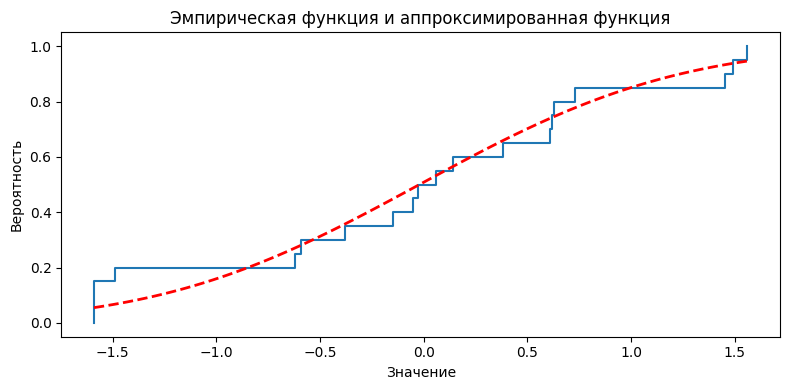

In [21]:
ecdf = ECDF(variation_s)
plt.figure(figsize=(8, 4))
plt.subplot(1, 1, 1)
plt.step(ecdf.x,ecdf.y, where='post')
mu, std = norm.fit(variation_s)
xmin, xmax = min(variation_s), max(variation_s)
x = np.linspace(xmin, xmax, 100)
p = norm.cdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2, label='Аппроксимированная функция (нормальное распределение)')
plt.title('Эмпирическая функция и аппроксимированная функция')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.tight_layout()
plt.savefig('эмпирическая.png')
plt.show()



### Гистограмма и полигон приведенных частот группированной выборки

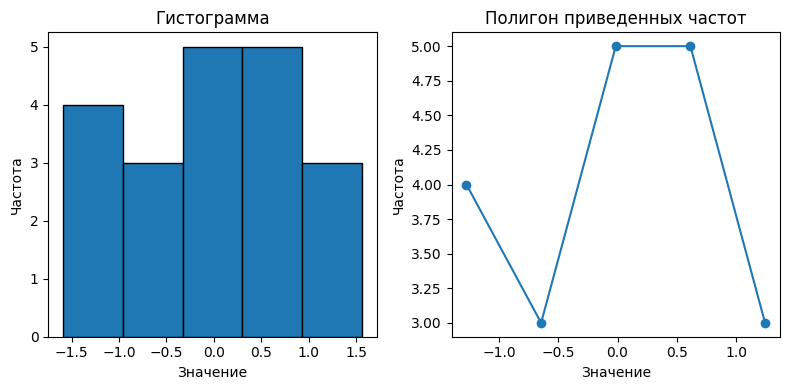

In [22]:
num_bins = 5  # Количество интервалов
hist, bins = np.histogram(variation_s, bins=num_bins)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(variation_s, bins=num_bins, edgecolor='black')
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, hist, marker='o', linestyle='-')
plt.title('Полигон приведенных частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.tight_layout()
plt.savefig('гистограмма.png')
plt.show()